<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/06_cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Fashion MNIST

In [ ]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [ ]:
!/opt/bin/nvidia-smi

Wed Oct  7 16:18:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |    875MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
K = len(set(y_train))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5252 - accuracy: 0.8054 - val_loss: 0.4203 - val_accuracy: 0.8379
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3671 - accuracy: 0.8622 - val_loss: 0.3501 - val_accuracy: 0.8704
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3170 - accuracy: 0.8814 - val_loss: 0.3303 - val_accuracy: 0.8756
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2817 - accuracy: 0.8937 - val_loss: 0.3119 - val_accuracy: 0.8850
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2574 - accuracy: 0.9031 - val_loss: 0.2994 - val_accuracy: 0.8900
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2351 - accuracy: 0.9119 - val_loss: 0.3003 - val_accuracy: 0.8910
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2169 - accuracy: 0.9166 - val_loss: 0.3168 - val_accuracy:

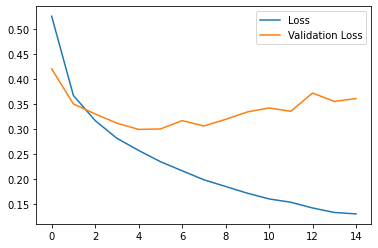

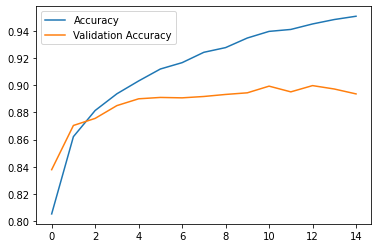

313/313 [==============================] - 1s 2ms/step - loss: 0.3610 - accuracy: 0.8936
Accuracy: 0.8935999870300293


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(K, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

Confusion matrix, without normalization
[[827   3  22  27   3   0 114   0   4   0]
 [  1 978   1  15   1   0   3   0   1   0]
 [ 12   0 838  10  42   0  96   0   2   0]
 [ 10   5  14 920  25   0  24   0   2   0]
 [  0   1  75  31 806   0  86   0   1   0]
 [  0   0   0   2   0 961   0  18   2  17]
 [109   1  43  28  80   0 730   0   9   0]
 [  0   1   0   0   0   7   0 943   0  49]
 [  3   1   6   3   6   1  15   2 961   2]
 [  1   0   0   0   0   4   0  23   0 972]]


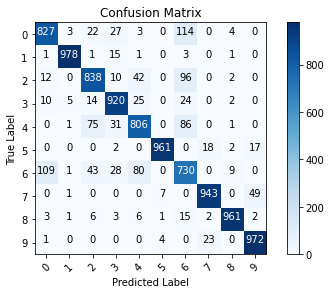

In [ ]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(K)))

## Display a random misclassified image

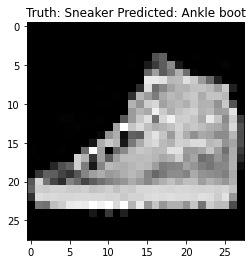

In [ ]:
labels = [
    'T-shirt/top', 
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]
misclassified_idx = np.where(p_test != y_test)[0]
i =  np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title(f'Truth: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}')
plt.show()